<a href="https://colab.research.google.com/github/ekene0013/Projects-from-WQU-on-Financial-Econometrics/blob/main/Financial_Econometrics_GW1_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work Project 1 - Financial Econometrics (MScFE)

In [ ]:
#!pip install yfinance
#!pip install yfinance as yf
#!pip install jinja2

In [ ]:
#%matplotlib inline
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# 1. Skewness

**1.1 Definition:**
Skewness is a statistical indicator of a normal distribution's asymmetry. A normal distribution typically displays perfect symmetry, with neither a lean to the left nor a lean to the right (Ramsey & Schafer, 2013). Departures from this perfect symmetry, however, imply that the distribution is tilted to one side, resulting in some kind of asymmetry, which is typically characterized by the skewness of the distribution. Mathematically, the skewness of a distribution is calculated as follows (Wooldridge, 2019):
$\frac{{\sum_{i=1}^n (X_i - \bar{X})^3 \cdot p_i}}{{n \cdot \sigma^3}}\$
where X = random variable; and Xi= ith random variable;  X = mean of distribution; n = number of variables in the distribution;  = standard deviation. Following the formula, a distribution is said to be symmetric about zero when it has a symmetric distribution.

**1.2 Description:**
The presence of skewness in a distribution simply means that the data is not evenly spread out, and therefore, the normal distribution does not exhibit a mirror image on both sides. A positively skewed distribution has a longer tail on the right side (because the bulk of the data is concentrated towards the left), and the converse is the case for a negatively skewed distribution.

**1.3 Demonstration:**
To demonstrate the skewness of a normal distribution, we employ real-life examples of the distribution of daily returns of cryptocurrencies such as Bitcoin (BTC-USD) and Dogecoin (DOGE-USD) between the years 2020 and 2023 from the Yahoo Finance website. We selected these cryptocurrencies due to their high volatility over the years. See below the descriptive statistics of the selected cryptocurrencies.

The table titled Descriptive Statistics for the Daily Percentage Returns below suggests that the daily returns of Bitcoin have a skewness that is relatively close to zero. Compared to Bitcoin, the daily returns of Dogecoin are highly positively skewed, up to 17. These daily returns show two homogenous financial instruments that are different in terms of skewness.

**1.4 Diagram:**
In the diagrams below, we show the histogram of the returns for these two cryptocurrencies. The diagram below confirms that the daily returns of Dogecoin are positively skewed, while the daily returns of Bitcoin are relatively perfectly skewed, although slightly positive.

**1.5	Diagnosis:**
To diagnose the skewness of a distribution, the following tests can be employed: (i) Descriptive statistics: This entails employing the formula in Section 1.1. A balanced set of data would have a skewness of zero. On the other hand, a positively skewed data will have a skewness greater than 0 while the converse is the case; (ii) Visual inspection of a histogram or frequency plot: The rule-of-thumb here is to follow how titled the distribution is to the right (positively skewed distribution) or left (negatively skewed distribution); (iii) Use of Box and QQ Plots: A box plot will indicate the measure of central tendencies as well as outliers. A positively skewed distribution will have the median below the mean, plus the right whiskers of the box plot will be longer. The converse is also true. QQ plots compare a dataset's quantiles to those of a normal distribution. A divergence from a straight line suggests that the data is skewed.

**1.6	Damage:**
A skewed distribution leaves a lot to be desired. This is because it leads to: (i) biased estimates due to distortions of the measures of central tendencies and dispersion. For example, the mean of a right-skewed distribution is typically greater than its median; (ii) the presence of outliers and extreme values, which in turn can lead to violations of the normality assumption; (iii) unreliability in hypothesis testing mostly due to the violation of the normality assumptions; (iv) misleading interpretation of results as a small change in one variable can culminate in significant changes in another variable.

**1.7	Directions:**
To address some of the damages highlighted above, there are several approaches, as follows (Ramsey & Schafer, 2013; Moore, McCabe & Craig, 2018; Wooldridge, 2019; ): (i) data transformations such as logarithmic, square root, and reciprocal transformations to smooth the distribution of the data; (ii) the use of non-parametric statistical methods that do not assume a specific distribution; (iii) the use of robust statistical approaches that are less sensitive to outliers and deviations from normality; (iv) the use of categorization and grouping to minimize the impact of a few extreme values or outliers in a distribution; (v) the use of resampling techniques such as bootstrapping to evaluate statistics and generate confidence intervals. With bootstrapping, we can provide more robust estimates despite the skewness in the data; (vii) Selection of strategic statistical techniques that are more robust to skewness.


### Step 1: Crypotcurrency Data from Yahoo finance
 (a) **Bitcoin (BTC-USD)**
 (b) **Dogecoin (DOGE-USD)**

In [ ]:
def stock_Data(ls,start_date,end_date):
    data=pd.DataFrame()
    for i in ls:
        st=yf.download(i, start=start_date, end=end_date)["Adj Close"]
        st=st.reindex(st.index.strftime('%Y/%m/%d')).rename(i)
        data=pd.concat([data,st],axis=1)
    return data

In [ ]:
# Define the stocks and the time period for which you want to pull data
stock = ["BTC-USD","DOGE-USD"]
end_date = date.today()
start_date = end_date - timedelta(days=365.25*3)

In [ ]:
df=stock_Data(stock,start_date,end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
port=df.dropna(axis = 0, how = 'any')
port

,BTC-USD,DOGE-USD
2020/06/04,9800.636719,0.002631
2020/06/05,9665.533203,0.002596
2020/06/06,9653.679688,0.002587
2020/06/07,9758.852539,0.002606
2020/06/08,9771.489258,0.002584
...,...,...
2023/05/30,27702.349609,0.072361
2023/05/31,27219.658203,0.071660
2023/06/01,26819.972656,0.071492
2023/06/02,27249.589844,0.072612


## Daily Percentage Returns

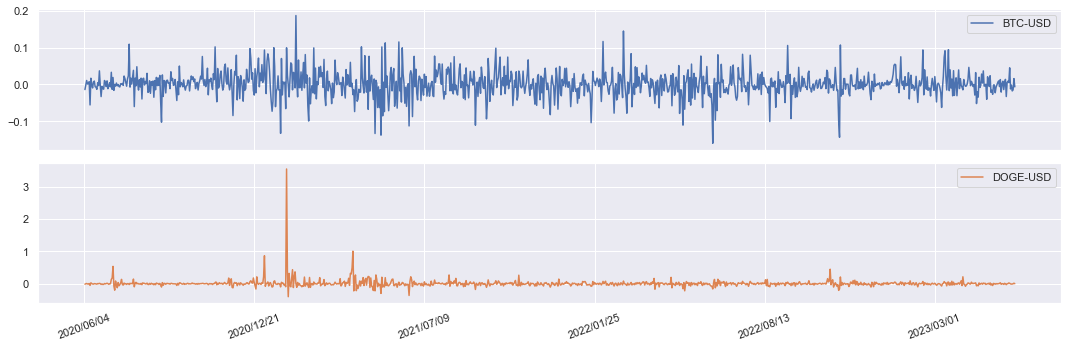

In [ ]:
returns=port.pct_change()
returns.plot(subplots=True, figsize =(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Descriptive Statistics for the Daily Percentage Returns

In [ ]:
ret=returns.mean(axis=0).rename('Mean Daily Returns')
var=returns.var(axis=0).rename('Variance')
std=returns.std(axis=0).rename('Standard Deviation')
skew = returns.skew(axis=0).rename('Skewness')
kurt = returns.kurt(axis=0).rename ('Kurtosis')
stats = pd.concat([ret,var,std,skew,kurt],axis=1)
stats

,Mean Daily Returns,Variance,Standard Deviation,Skewness,Kurtosis
BTC-USD,0.001528,0.001198,0.034613,0.046386,3.142106
DOGE-USD,0.007821,0.018209,0.134942,17.473368,441.913921


## Distribution of Selected Cryptocurrencies

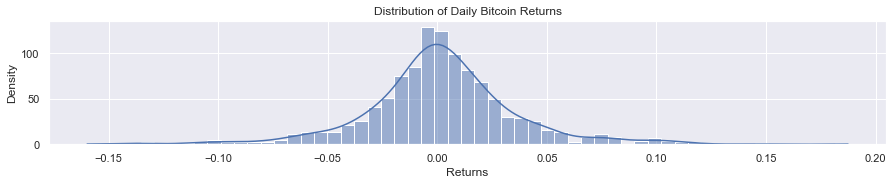

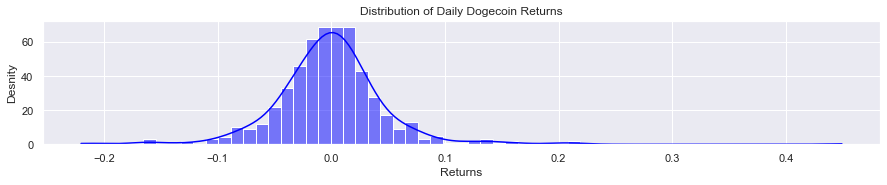

In [ ]:
# Plot the histogram of Daily Bitcoin Returns
# First histogram
ax1=plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
sns.histplot(returns[:len(returns)//1], x="BTC-USD", kde=True)
plt.title("Distribution of Daily Bitcoin Returns")
plt.xlabel("Returns")
plt.ylabel("Density")

# Second histogram of Daily Dogecoin Returns
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 2)
sns.histplot(returns[len(returns)//2:], x='DOGE-USD', color='blue', kde=True)
plt.title("Distribution of Daily Dogecoin Returns")
plt.xlabel("Returns")
plt.ylabel("Desnity")

plt.show()

# **2. Kurtosis / Heteroscedasticity**




**2.1	Definition**
Kurtosis is a statistical measure used to assess the shape of a distribution's tails. It compares the distribution to a normal distribution and determines whether the tails are heavier or lighter. This measure helps identify the presence of extreme price movements and fat tails in the context of volatility modeling (Tsay, 2005).
Kurtosis = (n - 1) * E[(x - µ)^4] / σ^4
Where n is the number of data points, µ is the mean of the data points and σ is the standard deviation of the data points.
On the other hand, heteroscedasticity refers to the unequal or varying levels of volatility observed in a time series. It implies that the volatility does not remain constant over time, leading to periods of both high and low volatility (Campbell et al., 1997).
Heterogeneity = σ^2 / µ^2
Where σ is the standard deviation of the data points and µ is the mean of the data points.

**2.2 Description**
In volatility modeling, high kurtosis indicates a higher likelihood of extreme events compared to a normal distribution. This suggests the presence of significant price movements and fat tails, which need to be considered for accurate risk assessment.
Heteroscedasticity, on the other hand, signifies that the volatility itself is not consistent over time. This time-varying nature of volatility can have implications on the modeling and estimation of risk measures, potentially leading to inaccurate results.

**2.3	Demonstration**
To demonstrate the challenges of kurtosis and heteroscedasticity, we will use simulated financial data. Specifically, we will work with a dataset containing daily returns of a stock over a specific time period.

**2.4	Diagram**
The diagrams will show the histogram of the distribution of daily returns and time series plot of daily returns highlighting periods of high and low volatility. It will provide a visual representation of the varying levels of volatility.

**2.5	Diagnosis**
From the histogram we can infer that the kurtosis of the distribution is likely close to that of a normal distribution. The absence of extremely heavy or light tails suggests that the distribution does not deviate significantly from a normal distribution in terms of kurtosis.
The time series plot shows significant variations and fluctuations in volatility, it suggests the presence of heteroscedasticity. Patterns of changing volatility indicate that the volatility is not constant and varies across different time periods.

**2.6	Damage**
Neglecting the impact of high kurtosis can result in underestimating the potential risk associated with extreme events. This can lead to inadequate hedging strategies and inaccurate valuation of derivatives.
Similarly, disregarding heteroscedasticity can introduce bias in volatility estimates and affect the accuracy of risk measures. Pricing models, hedging strategies, and risk management decisions may be compromised as a result.

**2.7	Directions**
To address kurtosis, one approach is to explore models that account for fat-tailed distributions, such as generalized autoregressive conditional heteroskedasticity (GARCH) models. GARCH models incorporate the phenomenon of volatility clustering and capture the time-varying nature of volatility, providing a more accurate representation of the data (Tsay, 2005).
For dealing with heteroscedasticity, heteroscedasticity-robust estimation techniques like generalized least squares (GLS) or weighted least squares (WLS) can be employed. These methods adjust for varying levels of volatility, leading to more reliable estimates (Campbell et al., 1997).


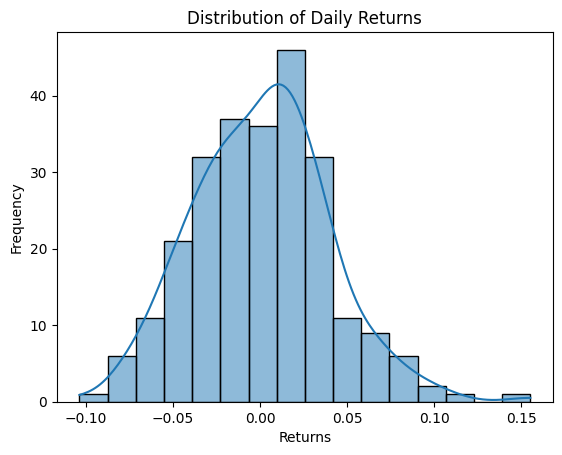

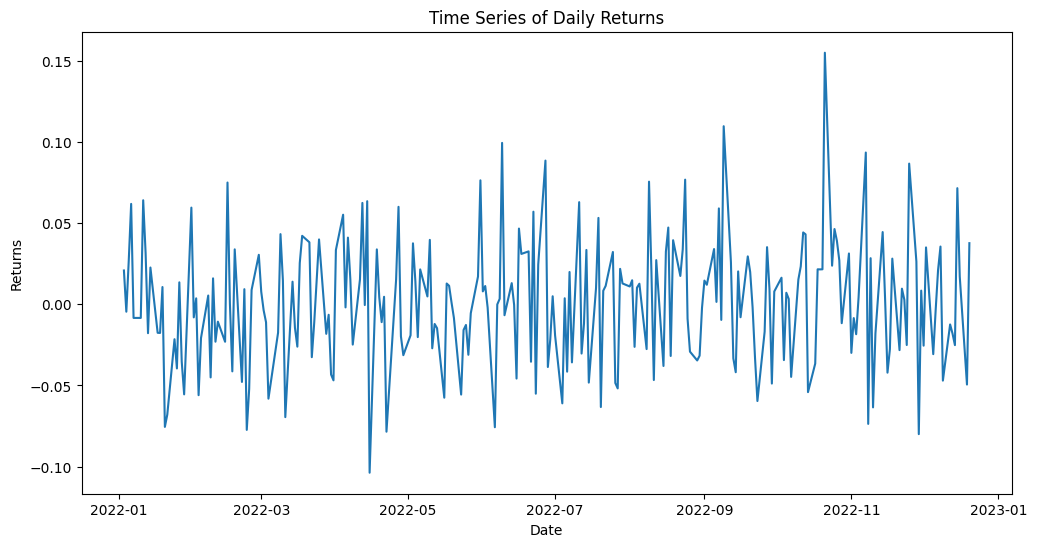

In [ ]:
#  Illustrating the challenges of kurtosis and heteroscedasticity, considering a simulated dataset comprising of daily returns of a stock over a period of time

import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
# Set the seed value for NumPy random number generator
np.random.seed(42)

# Set the seed value for Python random number generator
random.seed(42)

# Set the parameters
mean_return = 0.001  # Mean return of the stock
volatility = 0.04   # Volatility of the stock

# Set the number of trading days
num_days = 252

# Generate the daily returns
returns = np.random.normal(mean_return, volatility, num_days)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram of returns
sns.histplot(returns, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

# Generate the dates for the time series
dates = pd.date_range(start='2022-01-01', periods=num_days, freq='B')

# Create a DataFrame with dates and returns
df = pd.DataFrame({'Date': dates, 'Returns': returns})

# Plot the time series of returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Returns'])
plt.title("Time Series of Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()

# 2. Non-Stationarity

**4.1 Definition:**
In Panel A of the diagrams below, we show that the distribution of the prices for these two cryptocurrencies in levels (that is, their raw form) is non-stationary as they do not follow any pattern. However, when we take the first difference in panel B, we see that their trends become mean-reverting, and therefore stationary. . 4.1	Definition
In simplistic terms, stationarity is a feature of time series processes that suggests stability because the series is time-invariant. Therefore, non-stationarity suggests that a time series is time-variant over time due to the following properties – constant mean, constant variance, and constant autocovariances for each given lag (Gujarati, 2018; Brooks, 2019; Wooldridge, 2019).  Mathematically, the two models used to explain non-stationarity include: (i) the random walk model with drift; and (ii) the trend-stationary process.

**4.2 	Description:**
Non-stationarity describes a situation where statistical properties (e.g., mean and variance) change only because they are time-dependent and therefore not randomly distributed but follow a specific trend over time. A non-stationary time series is problematic as it does not allow us to make predictions or estimate statistical measures accurately.

**4.3	Demonstration:**
To demonstrate the non-stationarity of a time series, we employ real-life examples of the prices of cryptocurrencies such as Bitcoin (BTC-USD) and Dogecoin (DOGE-USD) between the years 2020 and 2023 from the Yahoo Finance website. We selected cryptocurrencies due to their high volatility over the years.

**4.5	Diagnosis:**
To diagnose whether a time series is non-stationary, the following approaches can be employed: (i) visual inspection of a trend such that if we find that the trend is not mean-reverting, we suspect that the data is non-stationary; (ii) the augmented dickey-fuller (ADF) test with the null hypothesis of the existence of a unit root (that is, non-stationarity). So we want to reject the null  hypothesis if the p-value of the test is below a chosen significance level; ; (iii) the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) and Phillips-Perron (PP) tests. The tests use different test statistic(s), but the procedure of hypothesis testing is similar to that discussed for the ADF test.

**4.6	Damage:**
Just like a skewed distribution, a non-stationary time series leaves a lot to be desired. This is because it leads to: (i) the measurement of inaccurate statistical measures such as means, variances, and correlations, thereby making it impossible to obtain reliable estimates; (ii) difficulty in differentiating between genuine trends or patterns and spurious relationships; (iii) unreliable forecasts as historical data that are non-stationary cannot accurately predict future values; (iv) spurious regression, which is asymptomatic of a situation where both the dependent and independent variables are non-stationary, creating a misleading relationship due to the presence of common trends or patterns; (v) violations of the assumptions of linear regression or autoregressive integrated moving average (ARIMA) models. These in turn culminate in unreliable model outputs, biased parameter estimates etc.

**4.7	Directions:**
To address some of the damages highlighted above, here are a few techniques (Gujarati, 2018; Brooks, 2019): (i) differencing, which ordinarily means taking the difference between consecutive observations. Differencing helps to detrend the data by removing patterns that cause non-stationarity. Such differencing can be done multiple times; (ii) applying mathematical transformations that help introduce stationarity, e.g., the logarithmic or box-cox transformation; (iii) making seasonal adjustments that are responsible for non-stationarity, e.g., seasonal decomposition of time series; (iv) detrending the data by fitting a regression model to help generate and extract the residuals, which represent the detrended series. Detrending can help eliminate the trend component and make the data stationary; (v) the use of model-based approaches  where specific time series models like the ARIMA models that naturally incorporate differencing to achieve stationarity.


## Daily Prices of Bitcoin and Dogecoin between 2020 and 2023

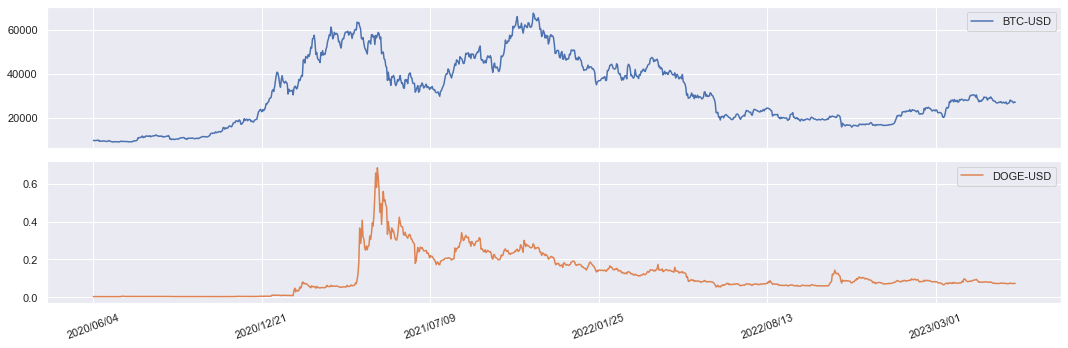

In [ ]:
port.plot(subplots=True, figsize =(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Descriptive Statistics for the Daily Prices of Bitcoin and Dogecoin

In [ ]:
prices=port.mean(axis=0).rename('Mean Daily Prices')
var=port.var(axis=0).rename('Variance')
std=port.std(axis=0).rename('Standard Deviation')
skew = port.skew(axis=0).rename('Skewness')
kurt = port.kurt(axis=0).rename ('Kurtosis')
stats = pd.concat([ret,var,std,skew,kurt],axis=1)
stats

,Mean Daily Returns,Variance,Standard Deviation,Skewness,Kurtosis
BTC-USD,0.001528,2.310873e+08,15201.556846,0.390521,-0.918117
DOGE-USD,0.007821,1.112402e-02,0.105470,1.526023,3.189949


## First Difference of Daily Prices of Bitcoin and Dogecoin between 2020 and 2023

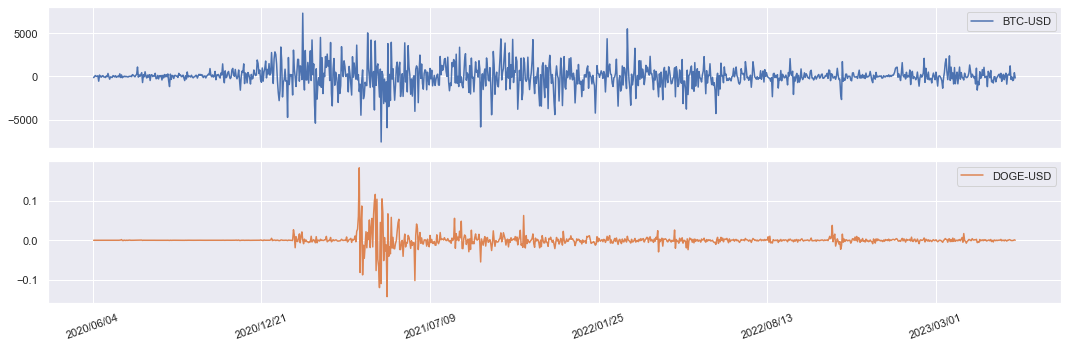

In [ ]:
port_firstdiff=port.diff()
port_firstdiff.plot(subplots=True,figsize=(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Second Difference of Daily Prices of Bitcoin and Dogecoin between 2020 and 2023

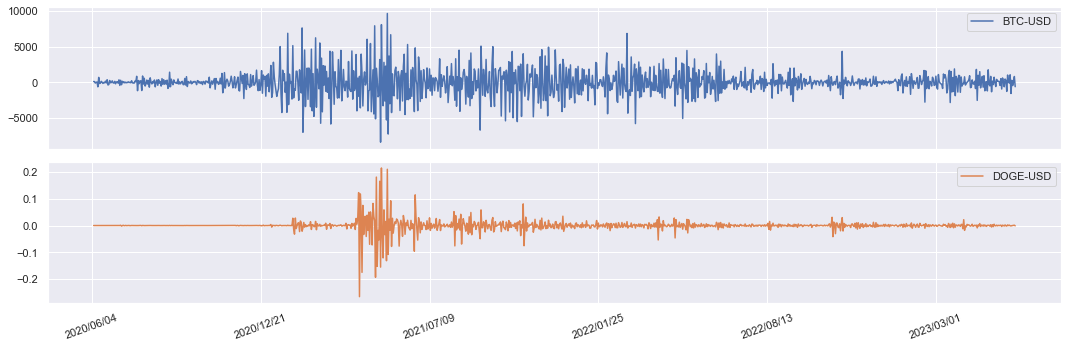

In [ ]:
port_seconddiff=port_firstdiff.diff()
port_seconddiff.plot(subplots=True, figsize=(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()